In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1')

# Display the first few rows of the dataframe
print(df.head())
print(df.info())

        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

In [3]:
### Clean and Preprocess the Data

# Check for missing values
print(df.isnull().sum())

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64


In [4]:
df = df.drop(columns=['Time', 'Flight #', 'cn/ln','Ground', 'Summary', 'Route'])

In [5]:
# Drop rows with missing critical data or fill in missing values as appropriate
df = df.dropna(subset=['Location', 'Operator', 'AC Type', 'Registration', 'Aboard','Aboard Passangers', 'Aboard Crew', 'Fatalities','Fatalities Passangers', 'Fatalities Crew' ])

print(df.isnull().sum())

Date                     0
Location                 0
Operator                 0
AC Type                  0
Registration             0
Aboard                   0
Aboard Passangers        0
Aboard Crew              0
Fatalities               0
Fatalities Passangers    0
Fatalities Crew          0
dtype: int64


In [6]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

During data-cleaning we dropped the columns with many missing values, dropped the rows from columns with several missing values. Also checked all the dates to be in propper format

In [7]:
### Exploratory Data Analysis (EDA)
# Basic Statistics
print(df.describe())

# Number of crashes
num_crashes = df.shape[0]
print(f"Number of crashes: {num_crashes}")

# Total fatalities
total_fatalities = df['Fatalities'].sum()
print(f"Total fatalities: {total_fatalities}")

# Survival rates
total_aboard = df['Aboard'].sum()
total_survivors = total_aboard - total_fatalities
survival_rate = total_survivors / total_aboard if total_aboard > 0 else 0
print(f"Survival rate: {survival_rate:.2%}")


                                Date       Aboard  Aboard Passangers  \
count                           4567  4567.000000        4567.000000   
mean   1972-03-14 14:28:02.154587224    31.927305          27.444055   
min              1918-12-16 00:00:00     0.000000           0.000000   
25%              1952-08-25 00:00:00     6.000000           3.000000   
50%              1971-07-24 00:00:00    16.000000          12.000000   
75%              1992-09-27 00:00:00    36.000000          31.000000   
max              2023-11-01 00:00:00   644.000000         614.000000   
std                              NaN    46.902434          44.827126   

       Aboard Crew   Fatalities  Fatalities Passangers  Fatalities Crew  
count  4567.000000  4567.000000            4567.000000      4567.000000  
mean      4.492446    22.801401              19.297570         3.575432  
min       0.000000     0.000000               0.000000         0.000000  
25%       2.000000     4.000000               1.000000 

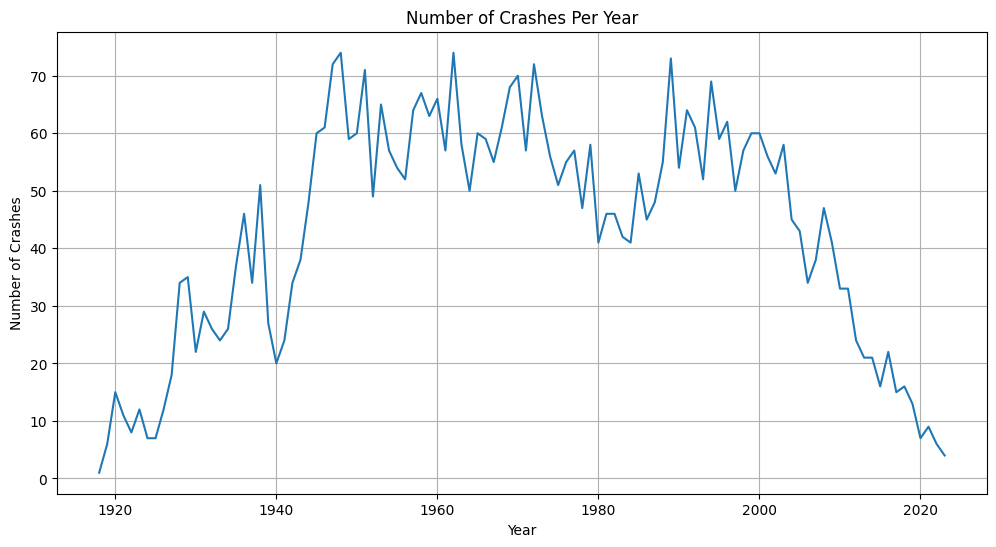

In [8]:
# Analyzing Frequency of Crashes Over Time

df1 = df.copy()

# Extract year from date
df1['Year'] = df1['Date'].dt.year

# Count crashes per year
crashes_per_year = df1.groupby('Year').size()

# Plot crashes over time
plt.figure(figsize=(12, 6))
crashes_per_year.plot(kind='line')
plt.title('Number of Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

In [9]:
### Statistical Analysis
#Distribution of Fatalities

# Mean, median, and standard deviation of fatalities
mean_fatalities = df['Fatalities'].mean()
median_fatalities = df['Fatalities'].median()
std_fatalities = df['Fatalities'].std()

print(f"Mean fatalities: {mean_fatalities}")
print(f"Median fatalities: {median_fatalities}")
print(f"Standard deviation of fatalities: {std_fatalities}")

# Test for normality
k2, p = stats.normaltest(df['Fatalities'])
print(f"p-value for normality test: {p}")

if p < 0.05:
    print("The data does not follow a normal distribution")
else:
    print("The data follows a normal distribution")

Mean fatalities: 22.80140135756514
Median fatalities: 11.0
Standard deviation of fatalities: 36.2625689872587
p-value for normality test: 0.0
The data does not follow a normal distribution


In [10]:
# Distribution of survival rates
# Calculate the survival rate for each row
df['Survival Rate'] = (df['Aboard'] - df['Fatalities']) / df['Aboard']

# Mean, median, and standard deviation of survival rates
mean_surv = df['Survival Rate'].mean()
median_surv = df['Survival Rate'].median()
std_surv = df['Survival Rate'].std()

print(f"Mean survival rates: {mean_surv}")
print(f"Median survival rates: {median_surv}")
print(f"Standard deviation of survival rates: {std_surv}")

# Test for normality
k2, p = stats.normaltest(df['Survival Rate'])
print(f"p-value for normality test: {p}")

if p < 0.05:
    print("The data does not follow a normal distribution")
else:
    print("The data follows a normal distribution")

Mean survival rates: 0.18493517836972992
Median survival rates: 0.0
Standard deviation of survival rates: 0.3148041964476689
p-value for normality test: nan
The data follows a normal distribution


In [12]:
# Hypothesis-testing
df2 = df.copy()

# Filter for Russian planes
df_russian = df2[df2['Operator'].str.contains('Russia'or 'Russian', case=False, na=False)]

# Create a new column for year
df_russian.loc[:, 'Year'] = pd.to_datetime(df_russian['Date'], errors='coerce').dt.year

# Create a new column for period
df_russian.loc[:, 'Period'] = pd.cut(
    df_russian['Year'],
    bins=[1999, 2014, 2023],
    labels=['2000-2014', '2014-2023'],
    right=True
)

# Calculate mean fatalities per period
mean_fatalities_per_period = df_russian.groupby('Period')['Fatalities'].mean()

print("Mean fatalities per period:")
print(mean_fatalities_per_period)

# Extract fatalities for the two periods
fatalities_2000_2014 = df_russian[df_russian['Period'] == '2000-2014']['Fatalities']
fatalities_2014_2023 = df_russian[df_russian['Period'] == '2014-2023']['Fatalities']

# Perform a t-test between the two periods
t_stat, p_value = stats.ttest_ind(fatalities_2000_2014, fatalities_2014_2023, nan_policy='omit')

print(f"T-statistic: {t_stat}, p-value: {p_value}")

Mean fatalities per period:
Period
2000-2014    35.750000
2014-2023    57.333333
Name: Fatalities, dtype: float64
T-statistic: -0.7876068451233167, p-value: 0.45117001550976776


<ipython-input-12-0c24d30061c9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_russian.loc[:, 'Year'] = pd.to_datetime(df_russian['Date'], errors='coerce').dt.year
<ipython-input-12-0c24d30061c9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_russian.loc[:, 'Period'] = pd.cut(


<ipython-input-13-00126b8b37d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Fatalities', data=df_russian, palette='coolwarm')


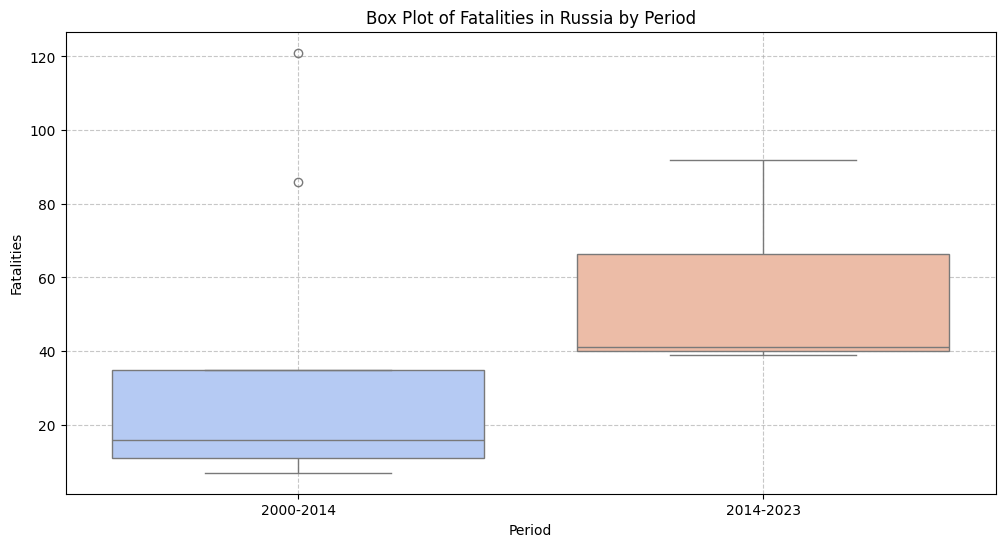

In [13]:
# Plot box plot for fatalities in the two periods
plt.figure(figsize=(12, 6))
sns.boxplot(x='Period', y='Fatalities', data=df_russian, palette='coolwarm')
plt.title('Box Plot of Fatalities in Russia by Period')
plt.xlabel('Period')
plt.ylabel('Fatalities')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

A p-value of 0.451 is significantly higher than the common alpha level of 0.05, indicating that there is no significant difference in the average number of fatalities of Russian planes between the periods 2000-2014 and 2014-2023. So sunctions doesn't actually effect the fatality level of crushes.

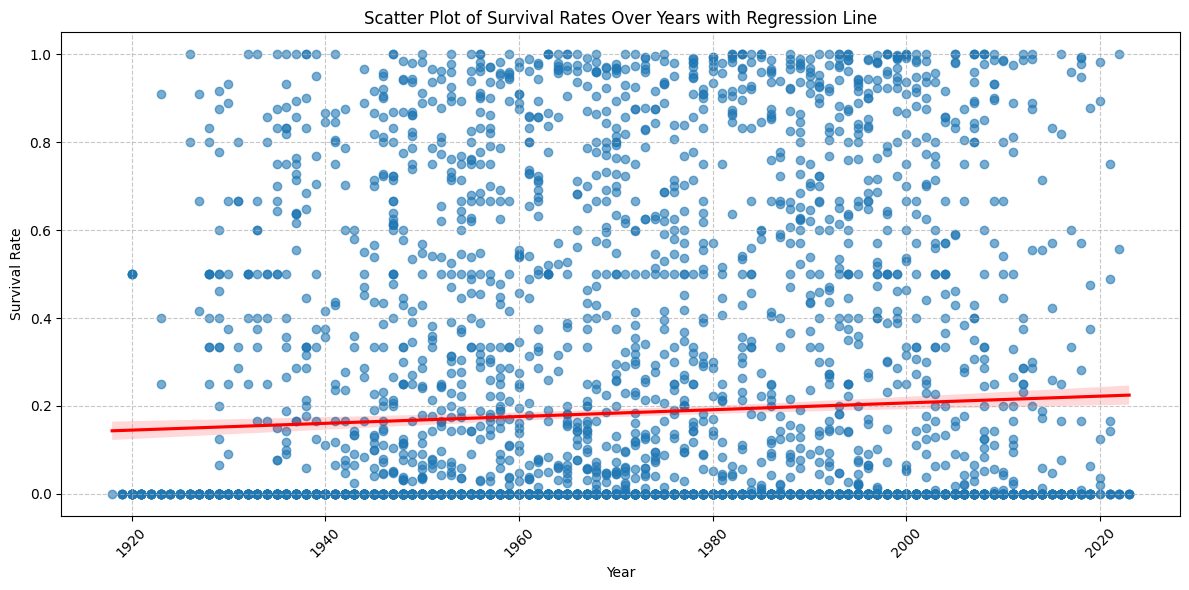

In [14]:
### Visualization
# Plot distribution of survival rates through years
# Extract year from the 'Date'
df['Year'] = df['Date'].dt.year

# Plot scatter plot of survival rates over years
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Year', y='Survival Rate', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot of Survival Rates Over Years with Regression Line')
plt.xlabel('Year')
plt.ylabel('Survival Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust plot to fit labels
plt.show()

We can notice, that survival rate is becomming slightly bigger through the years.

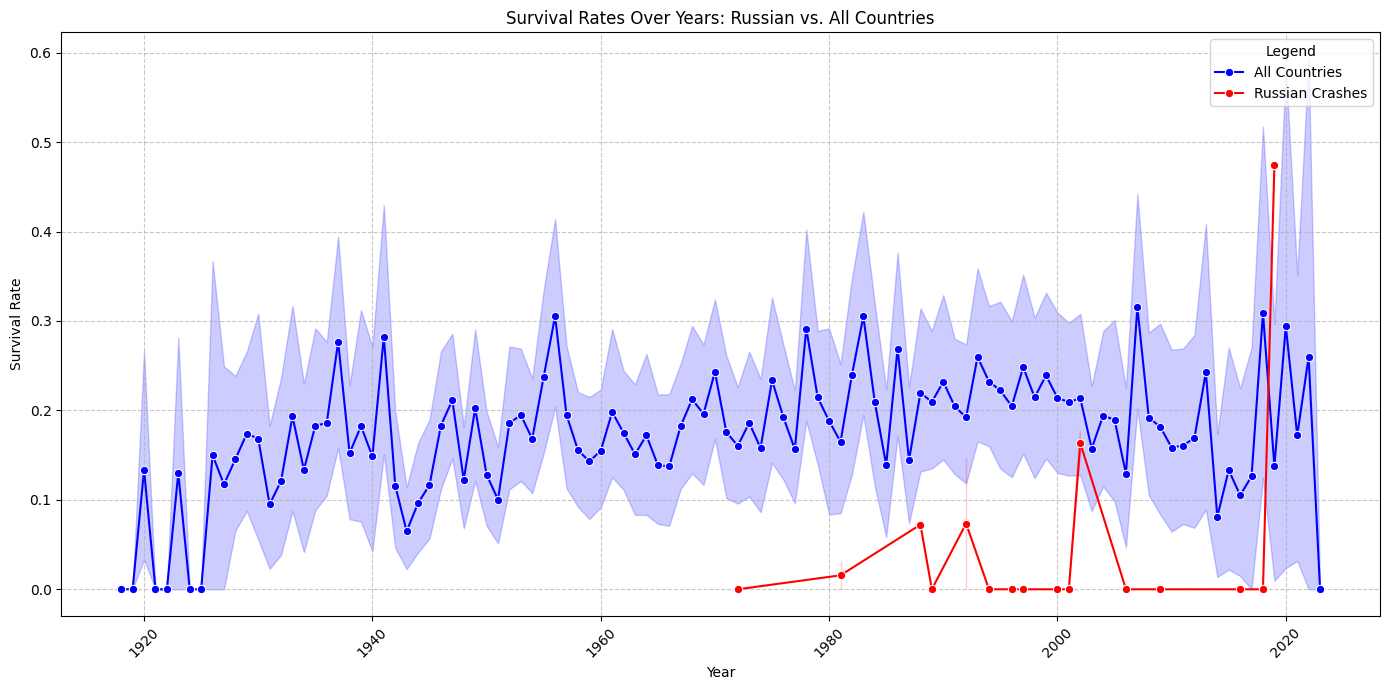

In [15]:
# Plot survival rates over years
# Plot survival rates over years for both Russian and all countries
plt.figure(figsize=(14, 7))

# Plot for all countries
sns.lineplot(data=df, x='Year', y='Survival Rate', label='All Countries', color='blue', marker='o')

# Plot for Russian crashes
sns.lineplot(data=df_russian, x='Year', y='Survival Rate', label='Russian Crashes', color='red', marker='o')

plt.title('Survival Rates Over Years: Russian vs. All Countries')
plt.xlabel('Year')
plt.ylabel('Survival Rate')
plt.legend(title='Legend')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust plot to fit labels
plt.show()

Here we can see, that survival rate in Russian crashes through the history was less, than in the whole world, but last years were more successfull in terms of survival rate.

### Conclusion

We can see several global trends on aircrashes - for the last decade there were significantly less crashes, than before. Survivor's rate also has a trend to grow. Here we can also notice, that for Russian planes survival rate was generally smaller, than globally, but for the last years it grew over the global level. T-test showed, that sunctions don't effect the fatality of the crushes.